In [1]:
from queue import PriorityQueue

In [14]:
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import gmplot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import functionality2
from IPython.display import IFrame
from statistics import mean

In [4]:
G = functionality2.get_graph()

In [5]:
network, distances, time, coordinates, weighted_network, df = functionality2.get_data()

1890822it [00:07, 269784.76it/s]


In [6]:
nodes=list(map(int,input("Choose a set of nodes (just enter the nodes id with spaces between them) ").split()))
measure=input("Choose a distance type " )

Choose a set of nodes (just enter the nodes id with spaces between them)  80 17 84
Choose a distance type  n


In [7]:
path = functionality2.find_smartest_path(nodes, measure, network, distances, time, coordinates, weighted_network)

check if there are duplicates in the given set of nodes
There are no duplicates in the given set of nodes
Check if there is a path between these nodes
There is a path bewteen the these nodes:  [80, 17, 84]
Looking for all paths bewteen of the given nodes
Choosing the best path among all
The minumum weight is: 9
The shortest path according to the network distance is: [17, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]


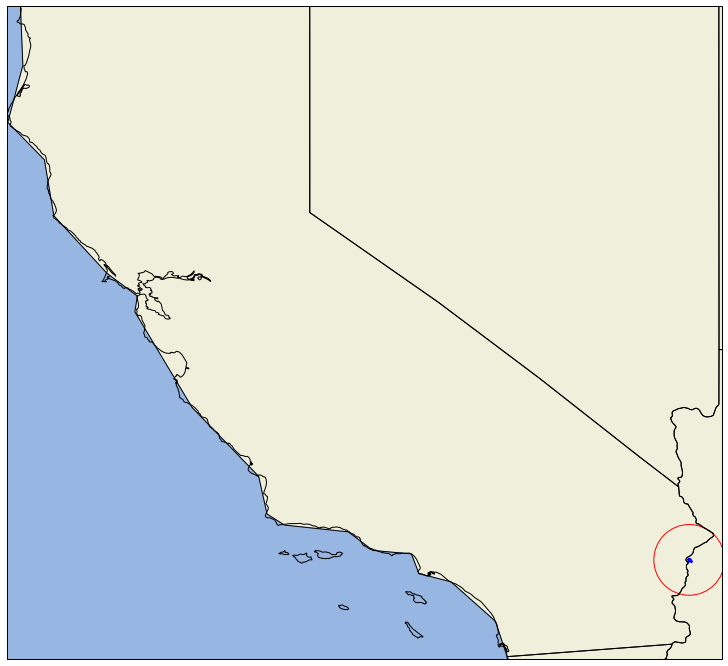

In [9]:
functionality2.draw_graph(path,G, coordinates, df)

In [11]:
functionality2.gmaps(coordinates, path)

In [16]:
res=IFrame('mapCC.html', width=700, height=600)

In [20]:
res

In [2]:
G = nx.Graph()
with open('USA-road-d.CAL.gr', 'r') as f:
    for line in f:
        if line[0] == 'a':
            n1, n2, d= list(map(int, line[2::].split()))
            G.add_edge(n1, n2, distance= d, weight= 1)

with open('USA-road-t.CAL.gr', 'r') as f:
    for line in f:
        if line[0] == 'a':
            n1, n2, t= list(map(int, line[2::].split()))
            G[n1][n2]['time_distance'] = t

with open('USA-road-d.CAL.co', 'r') as f:
    for line in f:
        if line[0] == 'v':
            n, lat, long = list(map(int, line[2::].split()))
            G.nodes[n]['latitude']= lat
            G.nodes[n]['longitude']= long
            G.nodes[n]['coordinates']= (lat, long)

KeyboardInterrupt: 

In [3]:
n_small = 75000

In [4]:
distances = defaultdict(dict)
weighted_network=defaultdict(dict)
network = defaultdict(list)
with open('USA-road-d.CAL.gr', 'r') as f:
    for _ in range(n_small):
        if f.readline()[0] == 'a': 
            n1, n2, d= list(map(int, f.readline()[2::].split()))
            distances[n1][n2] = d
            distances[n2][n1]= d
            weighted_network[n1][n2] = 1
            weighted_network[n2][n1]= 1
            network[n1].append(n2)
            network[n2].append(n1)

In [11]:
network[1]

[1048577, 1803]

In [7]:
time = defaultdict(dict)
with open('USA-road-t.CAL.gr', 'r') as f:
    for _ in range(n_small):
        if f.readline()[0]=='a':
            n1, n2,t = list(map(int, f.readline()[2::].split()))
            time[n1][n2]= t
            time[n2][n1]=t

In [8]:
coordinates = defaultdict(list)
with open('USA-road-d.CAL.co', 'r') as f:
    for line in tqdm(f):
        if line[0]=='v':
            n, lat, long= list(map(int, line[2::].split()))
            coordinates[n]=[lat, long]


1890822it [00:07, 258889.51it/s]


In [103]:
small_coords = coordinates
small_network= weighted_network
small_distances = distances
small_time = time

In [9]:
df = pd.DataFrame(coordinates).T

In [10]:
df.rename(columns={0:'latitude', 1:'longitude'}, inplace = True)

In [ ]:
# network, distances, time, coordinates, weighted_network = functionality2.get_data()
def get_data():
    n_small = 75000
    distances = defaultdict(dict)
    weighted_network=defaultdict(dict)
    network = defaultdict(list)
    with open('USA-road-d.CAL.gr', 'r') as f:
        for _ in range(n_small):
            if f.readline()[0] == 'a': 
                n1, n2, d= list(map(int, f.readline()[2::].split()))
                distances[n1][n2] = d
                distances[n2][n1]= d
                weighted_network[n1][n2] = 1
                weighted_network[n2][n1]= 1
                network[n1].append(n2)
                network[n2].append(n1)
    
    time = defaultdict(dict)
    with open('USA-road-t.CAL.gr', 'r') as f:
        for _ in range(n_small):
            if f.readline()[0]=='a':
                n1, n2,t = list(map(int, f.readline()[2::].split()))
                time[n1][n2]= t
                time[n2][n1]=t
    coordinates = defaultdict(list)
    with open('USA-road-d.CAL.co', 'r') as f:
        for line in tqdm(f):
            if line[0]=='v':
                n, lat, long= list(map(int, line[2::].split()))
                coordinates[n]=[lat, long]
                
    df = pd.DataFrame(coordinates).T
    df.rename(columns={0:'latitude', 1:'longitude'}, inplace = True)
    return network, distances, time, coordinates, weighted_network, df
    

In [11]:
BBox = (df.longitude.min()/1000000,df.longitude.max()/1000000, df.latitude.min()/1000000, df.latitude.max()/1000000)

In [12]:
BBox

(32.50005, 41.999924, -124.406566, -114.00007)

In [86]:
# BASIC FUNCTIONS

def checkIfDuplicates(list):
    ''' Check if given list contains any duplicates '''    
    for elem in list:
        if list.count(elem) > 1:
            return True
    return False

def removeDuplicates(list):
    ''' Remove from a given list any duplicates ''' 
    list.reverse()
    for elem in list:
        while list.count(elem) > 1:
            list.remove(elem)
    list.reverse()
    return list

def contained(list1, list2):
    for el in list1:
        if el in list2:
            continue
        else:
            return False
    return True

# return the index of a given node in the list of neightbours of another node
def look_for_it(element, list_of_list):
    for i in range(len(list_of_list)):
        if list_of_list[i][0]== element:
            return i
def look_for_it_network(element, list_of_list):
    for i in range(len(list_of_list)):
        if list_of_list[i]== element:
            return i

IF there is a path

In [79]:
# visits all the nodes of a graph (connected component) starting from a given node using BFS
def bfs(network, start):
    # keep track of all visited nodes
    explored = []
    # keep track of nodes to be checked
    queue = [start]

    levels = {}         # this dict keeps track of levels
    levels[start]= 0    # depth of start node is 0

    visited= [start]     # to avoid inserting the same node twice into the queue

    # keep looping until there are nodes still to be checked
    while queue:
       # pop shallowest node (first node) from queue
        node = queue.pop(0)
        explored.append(node)
        neighbours = network[node]

        # add neighbours of node to queue
        for neighbour in neighbours:
            if neighbour not in visited:
                queue.append(neighbour)
                visited.append(neighbour)

                levels[neighbour]= levels[node]+1
    return explored

def has_Path(nodes, network):
    for el in nodes:
        start= nodes[0]
        ans = bfs(network,start)
        if contained(nodes,ans):
            return True
        else:
            return False


The minimum between a pair

In [80]:
def dijkstra(graph,start,target, visited=[],distances={},predecessors={}):
    """ calculates a shortest path tree routed in src
    """    
    # a few sanity checks
    if start not in graph:
        raise TypeError('The root of the shortest path tree cannot be found')
    if target not in graph:
        raise TypeError('The target of the shortest path cannot be found')    
    #if start == destination
    if start == target:
        # We build the shortest path and display it
        path=[]
        pred=target
        while pred != None:
            path.append(pred)
            pred=predecessors.get(pred,None)
        # reverses the array, to display the path nicely
        return path
    else :
        # if it is the initial  run, initializes the cost
        if not visited: 
            distances[start]=0
            print
        # visit the neighbors
        for neighbor in graph[start] :
            if neighbor not in visited:
                new_distance = distances[start] + graph[start][neighbor]
                if new_distance < distances.get(neighbor,float('inf')):
                    distances[neighbor] = new_distance
                    predecessors[neighbor] = start
        # mark as visited
        visited.append(start)
        # now that all neighbors have been visited: recurse                         
        # select the non visited node with lowest distance 'x'
        # run Dijskstra with src='x'
        unvisited={}
        for k in graph:
            if k not in visited:
                unvisited[k] = distances.get(k,float('inf'))        
        x=min(unvisited, key=unvisited.get)
        return dijkstra(graph,x,target,visited,distances,predecessors)
    

In [14]:
def djikstra_search(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        for next in [neg[0] for neg in graph[current]]:
            new_cost = cost_so_far[current] + [neg[1] for neg in graph[current] if neg[0]==next][0]
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost
                frontier.put(next, priority)
                came_from[next] = current
    node = goal
    route = [node]
    while node != start:
        route = [came_from[node]] + route
        node = came_from [node]
    return route, cost_so_far[goal]


In [172]:
djikstra_search(small_distances, 18, 21)

TypeError: 'int' object is not subscriptable

In [81]:
def physical_distance(all_paths, distances):
    how_far = []
    for path in all_paths:
        d=0
        for i in range(1,len(path)):
            d+=distances[path[i-1]][path[i]]
        how_far.append(d)
    idx= how_far.index(min(how_far))
    shortest_path= all_paths[idx]
    return shortest_path, min(how_far)

def time_distance(all_paths, time):
    how_far = []
    for path in all_paths:
        d=0
        for i in range(1,len(path)):
            d+=time[path[i-1]][path[i]]
        how_far.append(d)
    idx= how_far.index(min(how_far))
    shortest_path= all_paths[idx]
    return shortest_path, min(how_far)

def network_distance(all_paths, network):
    how_far = []
    for path in all_paths:
        d=0
        for i in range(1,len(path)):
            indx= look_for_it_network(path[i],network[path[i-1]])
            d+=1
        how_far.append(d)
    idx= how_far.index(min(how_far))
    shortest_path= all_paths[idx]
    return shortest_path, min(how_far)

In [82]:
def find_weight(path, distances, time, small_coords, measure):
    if measure== "d":
        d=0
        for i in range(1,len(path)):
            d+=distances[path[i-1]][path[i]]
        return d
        
    elif measure== "t":
        d=0
        for i in range(1,len(path)):
            d+=time[path[i-1]][path[i]]
        return d
        
    elif measure== "n":
        d=0
        for i in range(1,len(path)):
            d+=small_network[path[i-1]][path[i]]
        return d

In [95]:
def nodes_non_in_line(paths, nodes):
    ot=[]
    for i in range(len(paths)):
        for j in range(len(paths)):
            if i!= j:
                if (paths[i][-1]== paths[j][0]) & (paths[i][0]!= paths[j][-1]):
                    ot.append(paths[i][:-1]+paths[j])
                    
    new=[]
    for path in ot:
        if contained(nodes, path):
            new.append(path)
    return new

In [98]:
def find_smartest_path(network, distances, time, coordinates):
    line = input("Insert the list of nodes you wanto to analize and the distance measure you choose ( {t (time), d (space), n (network)} ). \n The input must be in this format: \n nodes separated by space + distance (t/d/n) \n e.g. : 1 2 3 8 + t -->")  
    ind = line.find('+')
    nodes= list( map (int, line[:ind].split()))
    measure = line[-1]
    print("measure chosen:", measure)
    
    print("check if there are duplicates in the given set of nodes")
    if checkIfDuplicates(nodes):
        print("There are duplicates in the given set of nodes")
        nodes = removeDuplicates(nodes)
        print("New set of nodes:", nodes)
    else :
        print("There are no duplicates in the given set of nodes")
        
    
    # check if there is a path between
    print('Check if there is a path between these nodes')
    if has_Path(nodes, network) == False:
        print("There is no path bewteen these nodes: ", nodes)
        return
    print('There is a path bewteen the these nodes: ', nodes)
    
    if len(nodes) == 2:
        print('Looking for paths between the two given nodes') 
        if measure=='d':
            path = dijkstra(distances, nodes[0], nodes[1],visited=[],distances={},predecessors={})
            minimum = find_weight(path, distances, time, coordinates, measure)
            print('the minumum weight is:', minimum)
            print('the shortest path according to the pysical distance is:', path)
            return path
        elif measure=='t':
            path = dijkstra(time, nodes[0], nodes[1],visited=[],distances={},predecessors={})
            minimum = find_weight(path, distances, time, coordinates, measure)
            print('the minumum weight is:', minimum)
            print('the shortest path according to the time distance is:', path)
            return path
        elif measure=='n':
            path = dijkstra(small_network, nodes[0], nodes[1],visited=[],distances={},predecessors={})
            minimum = find_weight(path, distances, time, coordinates, measure)
            print('the minumum weight is:', minimum)
            print('the shortest path according to the network distance is:', path)
            return path
    else:
        #if there are paths, let's look for all them
        print('Looking for all paths bewteen of the given nodes')
        all_paths=[]
        for i in range(len(nodes)):
            for j in range(len(nodes)):
                if j != i:
                    all_paths.append(dijkstra(small_network, nodes[i], nodes[j],visited=[],distances={},predecessors={}))
        # keep only those that goes throught all the nodes
        # if the nodes are not in a straight line the function give me error
        new_all = nodes_non_in_line(all_paths, nodes)
    
        print('Choosing the best path among all') 
        #choose the best one according to the distance   
        if measure=='d':
            path, minimum = physical_distance(new_all, distances)
            print('the minumum weight is:', minimum)
            print('the shortest path according to the pysical distance is:', path)
            return path
        elif measure=='t':
            path, minimum = time_distance(new_all, time)
            print('the minumum weight is:', minimum)
            print('the shortest path according to the time distance is:', path)
            return path
        elif measure=='n':
            path, minimum = network_distance(new_all, network)
            print('the minumum weight is:', minimum)
            print('the shortest path according to the network distance is:', path)
            return path
        
    

In [13]:
path = functionality2.find_smartest_path(network, distances, time, coordinates, weighted_network)

Insert the list of nodes you wanto to analize and the distance measure you choose ( {t (time), d (space), n (network)} ). 
 The input must be in this format: 
 nodes separated by space + distance (t/d/n) 
 e.g. : 1 2 3 8 + t --> 80 17 84 + t


measure chosen: t
check if there are duplicates in the given set of nodes
There are no duplicates in the given set of nodes
Check if there is a path between these nodes
There is a path bewteen the these nodes:  [80, 17, 84]
Looking for all paths bewteen of the given nodes
Choosing the best path among all
The minumum weight is: 248402
The shortest path according to the time distance is: [80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]


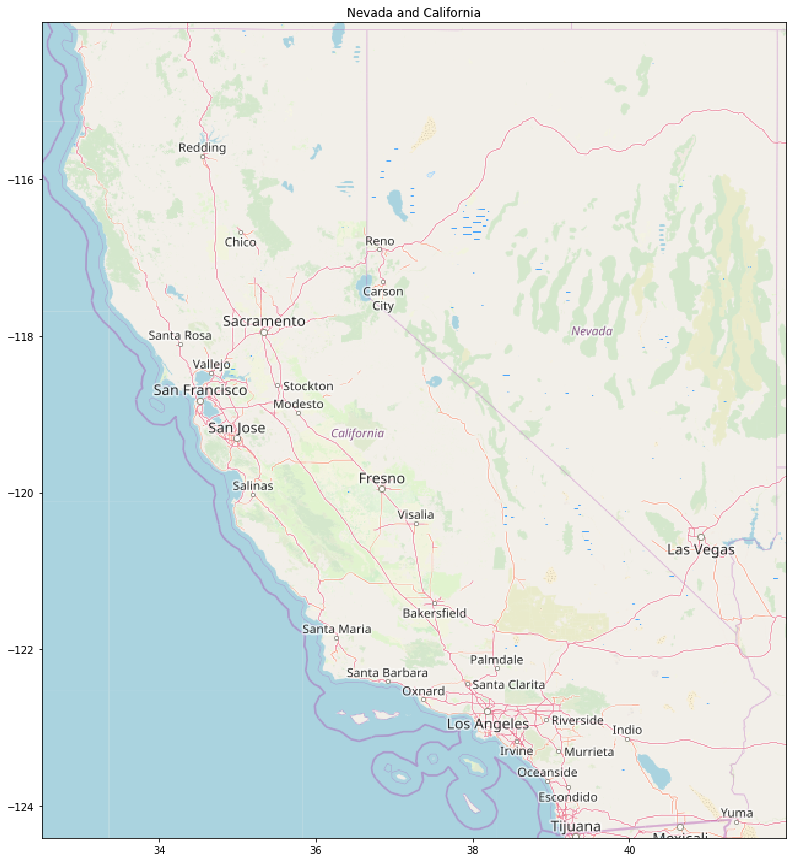

In [14]:
mappa = plt.imread('mapNevada-Caliornia.png')
fig, ax = plt.subplots(figsize = (17,15))
ax.set_title('Nevada and California')
ax.imshow(mappa, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

/home/flaminia/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 432x288 with 0 Axes>

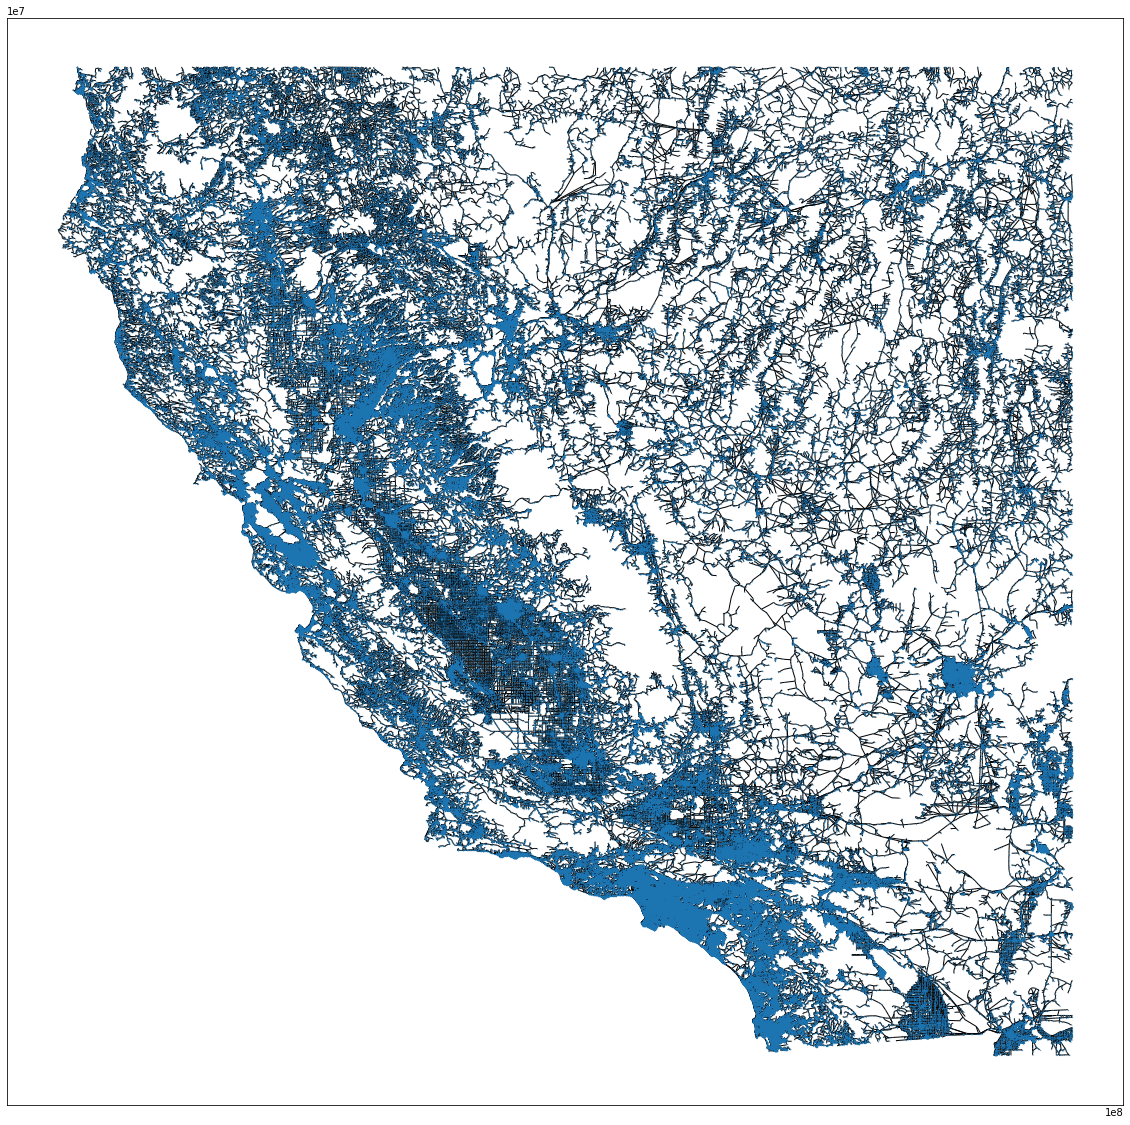

In [20]:
plt.clf()
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos = nx.get_node_attributes(G, 'coordinates'),
            with_labels = False, node_size = 0.01)
plt.show()

In [22]:
H = G.subgraph(path)

In [31]:
po= nx.spring_layout(H)

In [ ]:
plt.clf()
plt.figure(figsize=(20,20))
nx.draw_networkx(H, pos = nx.get_node_attributes(H, 'coordinates'),
                 with_labels = False, 
                 node_size = 0.1, 
                 zorder = 5)
nx.draw_networkx(G, pos = nx.get_node_attributes(G, 'coordinates'),
                 with_labels = False, 
                 node_size = 0.01,
                zorder= 0)
nx.draw_networkx_labels(H, pos =po)
nx.draw_networkx_edges(H, pos= po, edge_color='red', arrows=True)
plt.show()

In [33]:
coord = {node:{} for node in path}
for node in path:
    coord[node]['latitude'] = small_coords[node][0]
    coord[node]['longitude'] = small_coords[node][1]

In [44]:
df2 = pd.DataFrame(coord).T

In [45]:
df2.rename(columns={1:'longitude', 0:'latitude'}, inplace = True)

In [60]:
temp1=[]
temp2=[]
for el in df2.longitude.index:
    temp1.append(float(str(df2['longitude'][el])[:2]+'.'+str(df2['longitude'][el])[2:]))
    temp2.append(float(str(df2['latitude'][el])[:4]+'.'+str(df2['latitude'][el])[4:]))

In [105]:
BBox2 = [min(temp1), max(temp1),min(temp2), max(temp2)]
BBox2

[33.926469, 33.955548, -114.498651, -114.468562]

In [48]:
float(str(df2['longitude'][80])[:2]+'.'+str(df2['longitude'][80])[2:])

33.955545

In [63]:
df2['longitude'] = temp1
df2['latitude'] = temp2

In [64]:
df2

latitude  longitude
80      -114.477435  33.955545
66      -114.477047  33.955545
1048629 -114.468562  33.955548
81      -114.468634  33.926497
1048643 -114.477052  33.926473
1048668 -114.477615  33.926471
16      -114.485717  33.926469
17      -114.498651  33.926500

In [38]:
mappa = plt.imread('mapNevada-Caliornia.png')

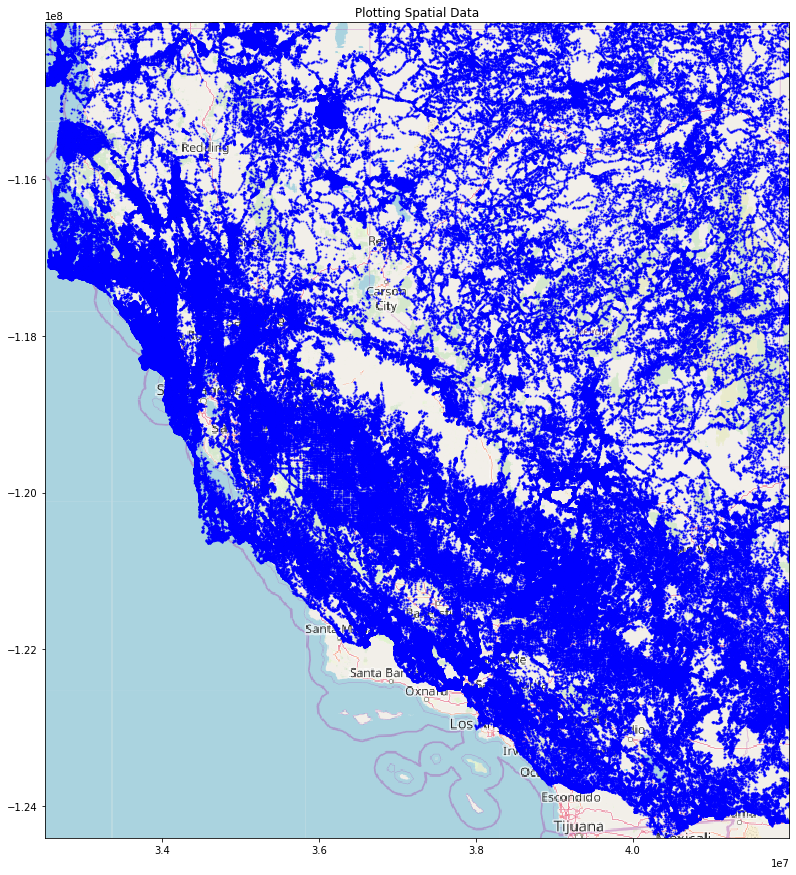

In [130]:
fig, ax = plt.subplots(figsize = (17,15))
ax.scatter(df.longitude, df.latitude, zorder=2, alpha= 0.5, c='b', s=1)
ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mappa, zorder=0, extent = BBox, aspect= 'equal')

In [173]:
def draw_graph(path, distances, time, coordinates, df):
    path_time = {}
    path_space = {}
    path_coord = {node:{} for node in path}
    for i in range(1,len(path)):
        path_space[(paths[i-1], paths[i])] = distances[paths[i-1]][paths[i]]
        path_time[(paths[i-1], paths[i])] = time[paths[i-1]][paths[i]]

    for node in path:
        path_coord[node]['latitude'] = coordinates[node][0]
        path_coord[node]['longitude'] = coordinates[node][1]
        
    G=nx.Graph()
    for node in path:
        G.add_node(node)
    for i in range(1,len(path)):
        G.add_edge(path[i-1],path[i])
        
    nx.set_node_attributes(G, path_coord)
    nx.set_edge_attributes(G, path_space, 'space')
    nx.set_edge_attributes(G, path_time, 'time')
    
    #BBox = (df.longitude.min(),df.longitude.max(),df.latitude.min(), df.latitude.max())
    BBox = [float(str(df.latitude.min())[:4]+'.'+str(df.latitude.min())[4:]), 
            float(str(df.latitude.max())[:4]+'.'+str(df.latitude.max())[4:]),
            float(str(df.longitude.min())[:2]+'.'+str(df.longitude.min())[2:]),
            float(str(df.longitude.max())[:2]+'.'+str(df.longitude.max())[2:])]
    df2 = pd.DataFrame(coord).T
    df2.rename(columns={1:'longitude', 0:'latitude'}, inplace = True)
    longitudes=[]
    latitudes=[]
    for el in df2.longitude.index:
        longitudes.append(float(str(df2['longitude'][el])[:2]+'.'+str(df2['longitude'][el])[2:]))
        latitudes.append(float(str(df2['latitude'][el])[:4]+'.'+str(df2['latitude'][el])[4:]))
        
    #df2['longitude'] = temp1
    #df2['latitude'] = temp2
    BBox2 = [min(longitudes), max(longitudes),min(latitudes), max(latitudes)]
            
    mappa = plt.imread('mapNevada-Caliornia.png')
    fig, ax = plt.subplots(figsize = (15,13))
    ax.scatter(longitudes, latitudes,zorder=1, alpha= 0.8, c='b', s=5, cmap=plt.get_cmap("jet"))
    plt.imshow(mappa, extent=BBox, zorder=0, alpha=1)
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)
    plt.show()
    

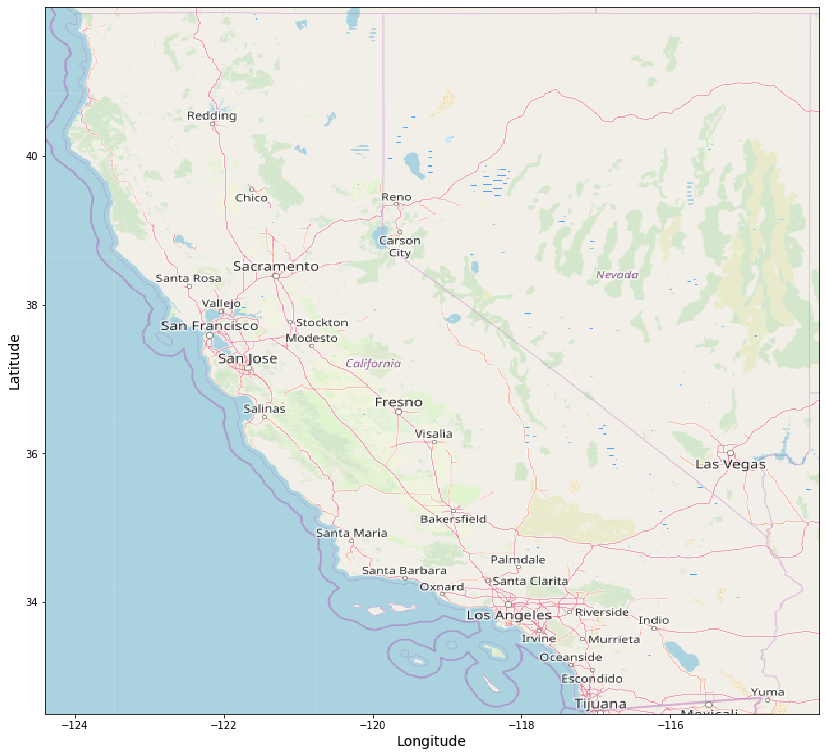

In [174]:
draw_graph(paths, small_distances, small_time, small_coords, df)

In [15]:
def draw_graph2(path,G, coordinates, df):
    H = G.subgraph(path)

    latitude=[]
    longitude=[]
    for node in path:
        latitude.append(coordinates[node][1]/1000000)
        longitude.append(coordinates[node][0]/1000000)
        
    BBox = [df.latitude.min()/1000000,df.latitude.max()/1000000,df.longitude.min()/1000000,df.longitude.max()/1000000]
    plt.figure(figsize=(14,12))
    # Creates the map
    ca_map = plt.axes(projection=ccrs.PlateCarree())
    ca_map.add_feature(cfeature.LAND)
    ca_map.add_feature(cfeature.OCEAN)
    ca_map.add_feature(cfeature.COASTLINE)
    ca_map.add_feature(cfeature.BORDERS, edgecolor = 'lightgray',linestyle=':')
    ca_map.add_feature(cfeature.LAKES, alpha=0.5)
    ca_map.add_feature(cfeature.RIVERS)
    ca_map.add_feature(cfeature.STATES.with_scale('10m'))
    plt.scatter(longitude,latitude,
         color='blue', s=2, marker='o',
         transform=ccrs.PlateCarree())
    plt.scatter(mean(longitude), mean(latitude), 
                color='red', s=5000,facecolors='none',
                transform=ccrs.PlateCarree())
    ca_map.set_extent(BBox)
    plt.show()
    

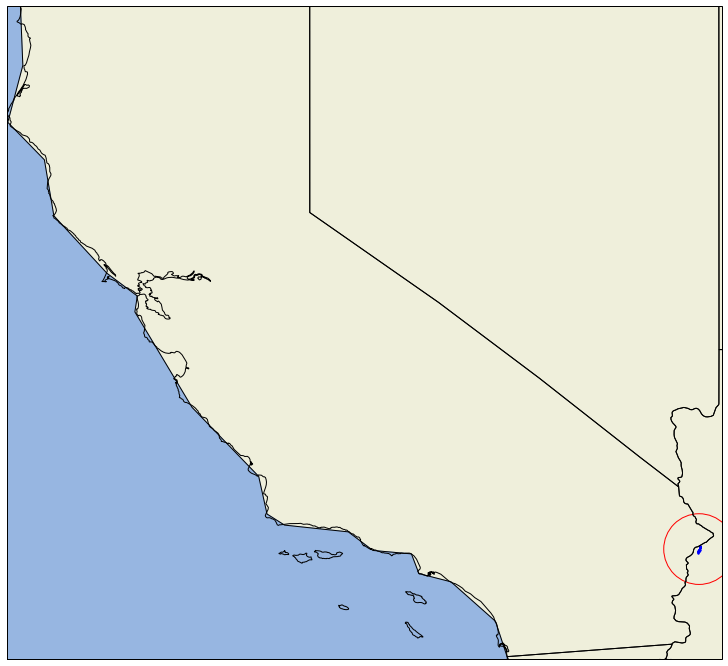

In [16]:
pathss = [4, 1049993, 1767, 1785, 1050007, 1805, 1050024, 1808, 1050022, 1799, 1050018, 1050332, 2206, 2205, 1050348, 2214, 1050350, 1050355, 2231, 2235, 2234, 1050367, 2230, 2229, 2237, 1050369, 2238, 1050368, 6, 5]

draw_graph2(pathss,G,coordinates, df)

In [17]:
def gmaps(coordinates, paths):
    latitude=[]
    longitude=[]
    for node in paths:
        latitude.append(coordinates[node][1]/1000000)
        longitude.append(coordinates[node][0]/1000000)
        
    lat_center = sum(latitude)/len(latitude)
    long_center = sum(longitude)/len(longitude)
    gmap2 = gmplot.GoogleMapPlotter(lat_center, long_center, 13)
    gmap2.scatter(latitude, longitude, '#0000FF', size=20, marker=True)
    gmap2.marker(latitude[0],longitude[0],"cornflowerblue", title="Flaminia & Dilara & Mechket")
    gmap2.plot(latitude, longitude, 'yellow', edge_width=2.5)
    gmap2.draw("mapCC.html")


In [42]:
pathss = [4, 1049993, 1767, 1785, 1050007, 1805, 1050024, 1808, 1050022, 1799, 1050018, 1050332, 2206, 2205, 1050348, 2214, 1050350, 1050355, 2231, 2235, 2234, 1050367, 2230, 2229, 2237, 1050369, 2238, 1050368, 6, 5]

gmaps(coordinates, pathss)

In [103]:
nodes = [80, 17, 124, 84]
measure = 'n'
all_paths=[]
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i!= j: #this avoids that we compute the dijkstra from a node to itself
            path = dijkstra(small_network, nodes[i], nodes[j],visited=[],distances={},predecessors={})
            path.reverse()
            all_paths.append(path)

In [104]:
all_paths

12


[[80, 1048641, 1048590, 16, 17],
 [80, 1048641, 1048590, 16, 124],
 [80, 66, 1048629, 81, 1048644, 84],
 [17, 16, 1048590, 1048641, 80],
 [17, 16, 124],
 [17, 16, 1048668, 1048643, 81, 1048644, 84],
 [124, 16, 1048590, 1048641, 80],
 [124, 16, 17],
 [124, 16, 1048668, 1048643, 81, 1048644, 84],
 [84, 1048644, 81, 1048629, 66, 80],
 [84, 1048644, 81, 1048643, 1048668, 16, 17],
 [84, 1048644, 81, 1048643, 1048668, 16, 124]]

In [124]:
def look_for_it(element, list_of_list):
    for i in range(len(list_of_list)):
        if list_of_list[i][0]== element:
            return i

In [126]:
def congiungi(all_paths, start): # j indice da cui partire
    for i in range(len(all_paths)):
        if all_paths[i][0] == start
            congiungi(all_paths, all_paths[i][-1])
            
            #print(all_paths[j][:-1]+all_paths[i])
            #ot.append(all_paths[j][:-1]+all_paths[i])
            #congiungi(all_paths, i, ot)

In [130]:
nodes = [80, 17, 124, 84]
for el in nodes:
    #print(el)
    congiungi(all_paths, el)

[80, 1048641, 1048590, 16, 17, 16, 124]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 80, 1048641, 1048590, 16, 124]
[80, 1048641, 1048590, 16, 80, 66, 1048629, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 80, 1048641, 1048590, 16, 17]
[80, 1048641, 1048590, 16, 80, 66, 1048629, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 80, 1048641, 1048590, 16, 17]
[80, 1048641, 1048590, 16, 80, 1048641, 1048590, 16, 124]


In [114]:
ot=[]
for el in nodes:
    for i in range(len(all_paths)):
        for j in range(len(all_paths)):
                if (all_paths[i][-1]== all_paths[j][0]) & (all_paths[i][0]!= all_paths[j][-1]):
                    ot.append(all_paths[i][:-1]+all_paths[j])
print(*ot, sep ='\n')                
nodes = [80, 17, 124, 84]

[80, 1048641, 1048590, 16, 17, 16, 124]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 124, 16, 17]
[80, 1048641, 1048590, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 66, 1048629, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 17]
[80, 66, 1048629, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 124]
[17, 16, 1048590, 1048641, 80, 1048641, 1048590, 16, 124]
[17, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]
[17, 16, 124, 16, 1048590, 1048641, 80]
[17, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84]
[17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048629, 66, 80]
[17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 124]
[124, 16, 1048590, 1048641, 80, 1048641, 1048590, 16, 17]
[124, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]
[124, 16, 17, 16, 1048590, 1048641, 80]
[124, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]
[124, 16, 1048668, 1048643, 81, 1048644, 84, 10

In [115]:
[80, 1048641, 1048590, 16, 124, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84] in ot

False

In [119]:
for el in ot:
    if set(el).intersection(set(nodes)) == set(nodes):
        print(el)

In [76]:
ot=[]
for i in range(len(all_paths)):
    for j in range(len(all_paths)):
        if i!= j:
            if (all_paths[i][-1]== all_paths[j][0]) & (all_paths[i][0]!= all_paths[j][-1]):
                ot.append(all_paths[i][:-1]+all_paths[j])
print(*ot, sep ='\n')                    
nodes = [80, 17, 124, 84]

[80, 1048641, 1048590, 16, 17, 16, 124]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 124, 16, 17]
[80, 1048641, 1048590, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 66, 1048629, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 17]
[80, 66, 1048629, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 124]
[17, 16, 1048590, 1048641, 80, 1048641, 1048590, 16, 124]
[17, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]
[17, 16, 124, 16, 1048590, 1048641, 80]
[17, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84]
[17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048629, 66, 80]
[17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 124]
[124, 16, 1048590, 1048641, 80, 1048641, 1048590, 16, 17]
[124, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]
[124, 16, 17, 16, 1048590, 1048641, 80]
[124, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]
[124, 16, 1048668, 1048643, 81, 1048644, 84, 10

In [92]:
all_paths = ot
ot=[]
for i in range(len(all_paths)):
    for j in range(len(all_paths)):
        if i!= j:
            if (all_paths[i][-1]== all_paths[j][0]) & (all_paths[i][0]!= all_paths[j][-1]):
                ot.append(all_paths[i][:-1]+all_paths[j])
print(*ot, sep ='\n')                    
nodes = [80, 17, 124, 84]

[80, 1048641, 1048590, 16, 17, 16, 124, 16, 1048590, 1048641, 80, 1048641, 1048590, 16, 17]
[80, 1048641, 1048590, 16, 17, 16, 124, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 17, 16, 124, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 17, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 17]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048629, 66, 80, 1048641, 1048590, 16, 17]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048629, 66, 80, 1048641, 1048590, 16, 124]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 17, 16, 124]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 124, 16, 17]
[80, 1048641, 1048590, 16, 124, 16, 17, 16, 1048590, 1048641, 80, 1048641, 1048590, 16, 124]
[80, 1048641, 1048590, 16

In [91]:
print(ot[-1])
print(nodes)
set(ot[-1]).intersection(set(nodes)) 

[84, 1048644, 81, 1048643, 1048668, 16, 124, 16, 17]
[80, 17, 124, 84]


{17, 84, 124}

In [95]:
old=[]
for path in ot:
    if contained(nodes, path):
        old.append(path)
print(*old, sep='\n')

[80, 1048641, 1048590, 16, 17, 16, 124, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 17, 16, 124, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 17, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 17]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048629, 66, 80, 1048641, 1048590, 16, 124]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 17, 16, 124]
[80, 1048641, 1048590, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 124, 16, 17]
[80, 1048641, 1048590, 16, 124, 16, 17, 16, 1048590, 1048641, 80, 66, 1048629, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 124, 16, 17, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84]
[80, 1048641, 1048590, 16, 124, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84, 1048644, 81, 1048643, 1048668, 16, 124]
[80, 1048641, 1048590, 16, 124, 1

In [98]:
[80, 1048641, 1048590, 16, 124, 16, 17, 16, 1048668, 1048643, 81, 1048644, 84] in old

False

In [97]:
path, minimum = physical_(old, small_distances)
print('the minumum weight is:', minimum)
print('If we wanto to go throught ', nodes)
print('the shortest path according to the pysical distance is:', path)

the minumum weight is: 137016
If we wanto to go throught  [80, 17, 124, 84]
the shortest path according to the pysical distance is: [80, 1048641, 1048590, 16, 124, 16, 17, 16, 124, 16, 1048668, 1048643, 81, 1048644, 84]
